# Lesson/Article 06 - Heart Disease Predictor

**Author: Gabriel Moretti de Souza - 200018205**

**Author's GitHub username: MorettiGS**

## HuggingFace

The following is the link for the HuggingFace space regarding this notebook:

[HugginFace - HeartDiseasePredictor](https://huggingface.co/spaces/MorettiGS/HeartDiseasePredictor)

## Objective

In this article, we are going through the creation and usage of a **identifier** using Artificial Intelligence, with the main purpose of training it to determine if a person has any heart disease or not.

For the creation of said predictor, we will be creating a neural network with the help of random forests that is capable of identifying said heart diseases based on 17 columns of data from the kaggle dataset [Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease), **on which we will select the 2020 data csv "heart_2020_cleaned.csv"**.

This search and results could be useful, in a real life situation, when trying to determine, even with little chance, if a person has any heart diseases or not.

## Pre-requisites

Previous downloads that were necessary for all dependencies used on the notebook:

In [1]:
# !pip install --upgrade pip setuptools wheel
# !pip install p5py
# !pip install PEP517
# !pip install gcc
# !pip install pandas
# !pip install kaggle
# !pip install opendatasets
# !pip install torch
# !pip install fastai

Before going any further, it is essential that we get the necessary dependencies for the AI training, and these can be found in the Python libraries imported with the code below:

In [31]:
import opendatasets as od # Responsible for dataset download
import numpy as np # Responsible for linear algebra
import pandas as pd # Responsible for data processing and manipulation
import pickle # Responsible for model exporting
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Creation of random forests
from sklearn.model_selection import train_test_split # Data split for training and testing
from sklearn.metrics import mean_absolute_error # Calculating Mean Absolut Error
from sklearn.metrics import accuracy_score

## Data Preprocessing

Now we can work on the data that will be used on this AI training. As said before, the data will be obtained by the use of the kaggle dataset. We can download it as follows, using the username and key from kaggle:

In [3]:
od.download(
    "https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease")

# Downloading it by kaggle username and key, or simply download it and add it to the directory

Skipping, found downloaded files in "./personal-key-indicators-of-heart-disease" (use force=True to force download)


Then, the dataset's columns can be seen organized as follows:

In [26]:
df = pd.read_csv('personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Now, to better work with the data, we will be transforming all labels to a respective value. Since we saw that there are certain options and ranges on the dataset for each column, we will be adjust them to a specific value, as follows:

In [5]:
# Replacing all "Yes" and "Male" for 1 and all "No" or "Female" for 0.
df.replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}, inplace=True)
# Replacing labels from Diabetic
df.replace({'Yes (during pregnancy)': 2, 'No, borderline diabetes': 3}, inplace=True)
# Determining labels for each GenHealth, from 1 to 5
df.replace({'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}, inplace=True)
# Determining labels for each Race, from 1 to 6, where 6 is "Others"
df.replace({'White': 1, 'Black': 2, 'Asian': 3, 'American Indian/Alaskan Native': 4, 'Hispanic': 5, 'Other': 6}, inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,1,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,1,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,1,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,1,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,5,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,5,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,5,0,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,5,0,0,3,12.0,0,0,0


For the following, the function will help with another convertion:

In [29]:
# functions for integer conversion
def convert_to_int(s):
    return int(s[:2])

Using said function, we can create an estimation for the ages, as follows:

In [7]:
df['AgeCategory'] = df['AgeCategory'].apply(convert_to_int)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,1,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,1,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,1,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,1,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,5,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,5,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,5,0,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,5,0,0,3,12.0,0,0,0


And, for a more clear nomenclature, we will rename said column:

In [8]:
# Renaming age column
df.rename(columns={'AgeCategory': 'AgeEstimate'}, inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeEstimate,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,1,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,1,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,1,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,1,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,5,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,5,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,5,0,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,5,0,0,3,12.0,0,0,0


Here in this dataset, HeartDisease is the column responsible for the label on our identifier, therefore we will be using it further ahead.

We can now express some of our data as info and graphs:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeEstimate       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

array([[<AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Smoking'}>,
        <AxesSubplot:title={'center':'AlcoholDrinking'}>],
       [<AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>,
        <AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'DiffWalking'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'AgeEstimate'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Diabetic'}>],
       [<AxesSubplot:title={'center':'PhysicalActivity'}>,
        <AxesSubplot:title={'center':'GenHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>,
        <AxesSubplot:title={'center':'Asthma'}>],
       [<AxesSubplot:title={'center':'KidneyDisease'}>,
        <AxesSubplot:title={'center':'SkinCancer'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=objec

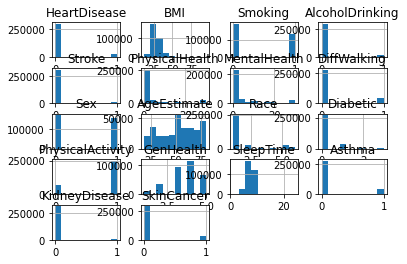

In [10]:
df.hist()

We can also show the values for the HeartDisease column, our classifying label:

<AxesSubplot:>

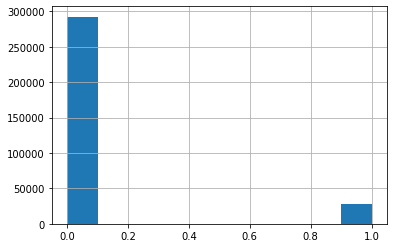

In [11]:
df['HeartDisease'].hist()

We can also see that the dataset doesn't have any null values:

In [12]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeEstimate         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

And this is the size of the dataset, with 319795 lines and 18 columns:

In [13]:
df.shape

(319795, 18)

## Creating Model with Random Forest

With the given data, we can now start creating our model. For that, we will be using the Random Forest algorithm.

A Random Forest is a learning algorithm that builds multiple decision trees and merges them together to get a more accurate and stable prediction.

Each decision tree in the forest is constructed using a random subset of the training data and a random subset of the features. This randomness helps to introduce diversity among individual trees, increasing the overall performance of the model.

### Creating test and training data

We can start by separating our data in two sections, one for the independent columns and one for the dependent column, each of them with their own train and test data, as can be seen below:

In [14]:
# Separating the dataset into X (train and test) and y (traing and test)
# X represents the independent columns, whereas y represents the only dependent column (HeartDisease)
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

For an example, we can see the first row of each split using 'iloc', as follows:

In [15]:
X_train.iloc[0]

BMI                 23.33
Smoking              1.00
AlcoholDrinking      0.00
Stroke               0.00
PhysicalHealth       0.00
MentalHealth         0.00
DiffWalking          0.00
Sex                  1.00
AgeEstimate         75.00
Race                 1.00
Diabetic             0.00
PhysicalActivity     1.00
GenHealth            4.00
SleepTime            7.00
Asthma               0.00
KidneyDisease        0.00
SkinCancer           0.00
Name: 95877, dtype: float64

In [16]:
X_test.iloc[0]

BMI                 27.63
Smoking              1.00
AlcoholDrinking      0.00
Stroke               0.00
PhysicalHealth       0.00
MentalHealth        25.00
DiffWalking          0.00
Sex                  0.00
AgeEstimate         25.00
Race                 5.00
Diabetic             0.00
PhysicalActivity     1.00
GenHealth            4.00
SleepTime            7.00
Asthma               0.00
KidneyDisease        0.00
SkinCancer           0.00
Name: 271884, dtype: float64

In [17]:
y_train.iloc[0]

0

In [18]:
y_test.iloc[0]

0

### Classifier Creation (Random Forest)

As noted before, we will now start the creation of the Random Forest as a classifier.

The function RandomForestClassifier is responsible for doing exactly that. We can start creating our model as follows:

In [19]:
model = RandomForestClassifier(150, min_samples_leaf=5)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=150)

In the code seen above, we use the specified function, where the arguments are described as follows:

- n_estimators: represents the number of decision trees in the forest. Raising this value can make for a more robust and solid model.

- min_samples_leaf: controls the minimal number of samples necessary for the creation of a decision tree, where each leaf has to achieve the minimal for the tree to be created. Makes sure the trees do not adjust too much to the given training data.

With both those parameters, the function is responsible for controlling the model's complexity and overfitting.

### Prediction

With the usage of the created model, it is possible to make a prediction on the test data using the predict() function, as follows:

In [20]:
# Using X_test data in the model, achieving the result y_pred
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

Now, just making sure the values are not all zero, we can count the number of appearances of each value:

In [21]:
# Storing unique values and its quantities
unique_values, counts = np.unique(y_pred, return_counts=True)

In [22]:
# Showing unique values
unique_values

array([0, 1])

In [23]:
# Showing quantities
counts

array([63277,   682])

In [38]:
# Showing results data
results = y_test==y_pred
results[:50]

271884     True
270361     True
219060     True
24010      True
181930     True
24149     False
185683     True
316656     True
305719     True
56786      True
240362     True
166773     True
156799     True
259623     True
220344     True
189010     True
301058     True
156366     True
42895      True
199052     True
221416     True
235723    False
223475     True
326        True
299663     True
75739      True
231975     True
36369      True
230715     True
142340     True
210513     True
968       False
227857     True
29693     False
223339     True
306225     True
154015     True
239020     True
265163     True
187674     True
182226     True
231958     True
199131     True
199866     True
22980      True
17826      True
47898     False
67985      True
89189      True
219846     True
Name: HeartDisease, dtype: bool

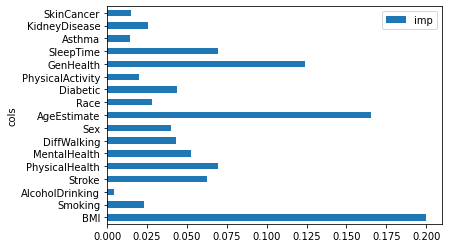

In [36]:
# Showing relevance
pd.DataFrame(dict(cols=X_train.columns, imp=model.feature_importances_)).plot('cols', 'imp', 'barh');

### MAE (Mean Absolut Error)

The Mean Absolute Error (MAE) is a metric commonly used on predictive models to measure the average absolute differences between predicted and actual values.

In simpler terms, for each observation on a list, you calculate the absolute difference between the predicted value and the actual value, and then take the average of these absolute differences across all observations.

To find the Mean Absolut Error of this model, the  we can do as follows:

In [24]:
# Calculating MAE with the sklearn function mean_absolute_error, taking 2 arrays as parameters
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.10f} ~ {mae*100:.5f}%')

Mean Absolute Error (MAE): 0.0858675089 ~ 8.58675%


In [33]:
# Showing accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.9141324911271284

## Saving model for use

The following code saves our model into a new file "model.pkl", enabling it for future usage:

In [25]:
# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)